# РЕГРЕСІЙНІ МОДЕЛІ

## Мета роботи: 
Ознайомитись з різновидами регресійних моделей.

## Завдання:
Завантажити дані про якість червоного вина

Дослідити дані, підготувати їх для побудови регресійної моделі

Розділити дані на навчальну та тестову вибірки

Побудувати декілька регресійних моделей для прогнозу якості вина (12 - quality). Використати лінійну одномірну та багатомірну регресію та поліноміальну регресію обраного вами виду (3-5 моделей)

Використовуючи тестову вибірку, з'ясувати яка з моделей краща

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

### Імпортуємо дані, переконаємось в їхній готовності для побудови моделі та візуалізуємо їх.

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
flag = False
for col in df.columns:
    if df[col].isnull().values.any():
        print(f"Стовпець '{col}' містить пусті значення.")
        flag = True
if not flag:
    print(f"Набір даних не містить пустих значень")

Набір даних не містить пустих значень


In [4]:
flag = False
for col in df.columns:
    if (df[col] < 0).any():
        print(f"Стовпець '{col}' містить від'ємні значення.")
if not flag:
    print(f"Набір даних не містить від'ємних значень")

Набір даних не містить від'ємних значень


<AxesSubplot:xlabel='quality', ylabel='Count'>

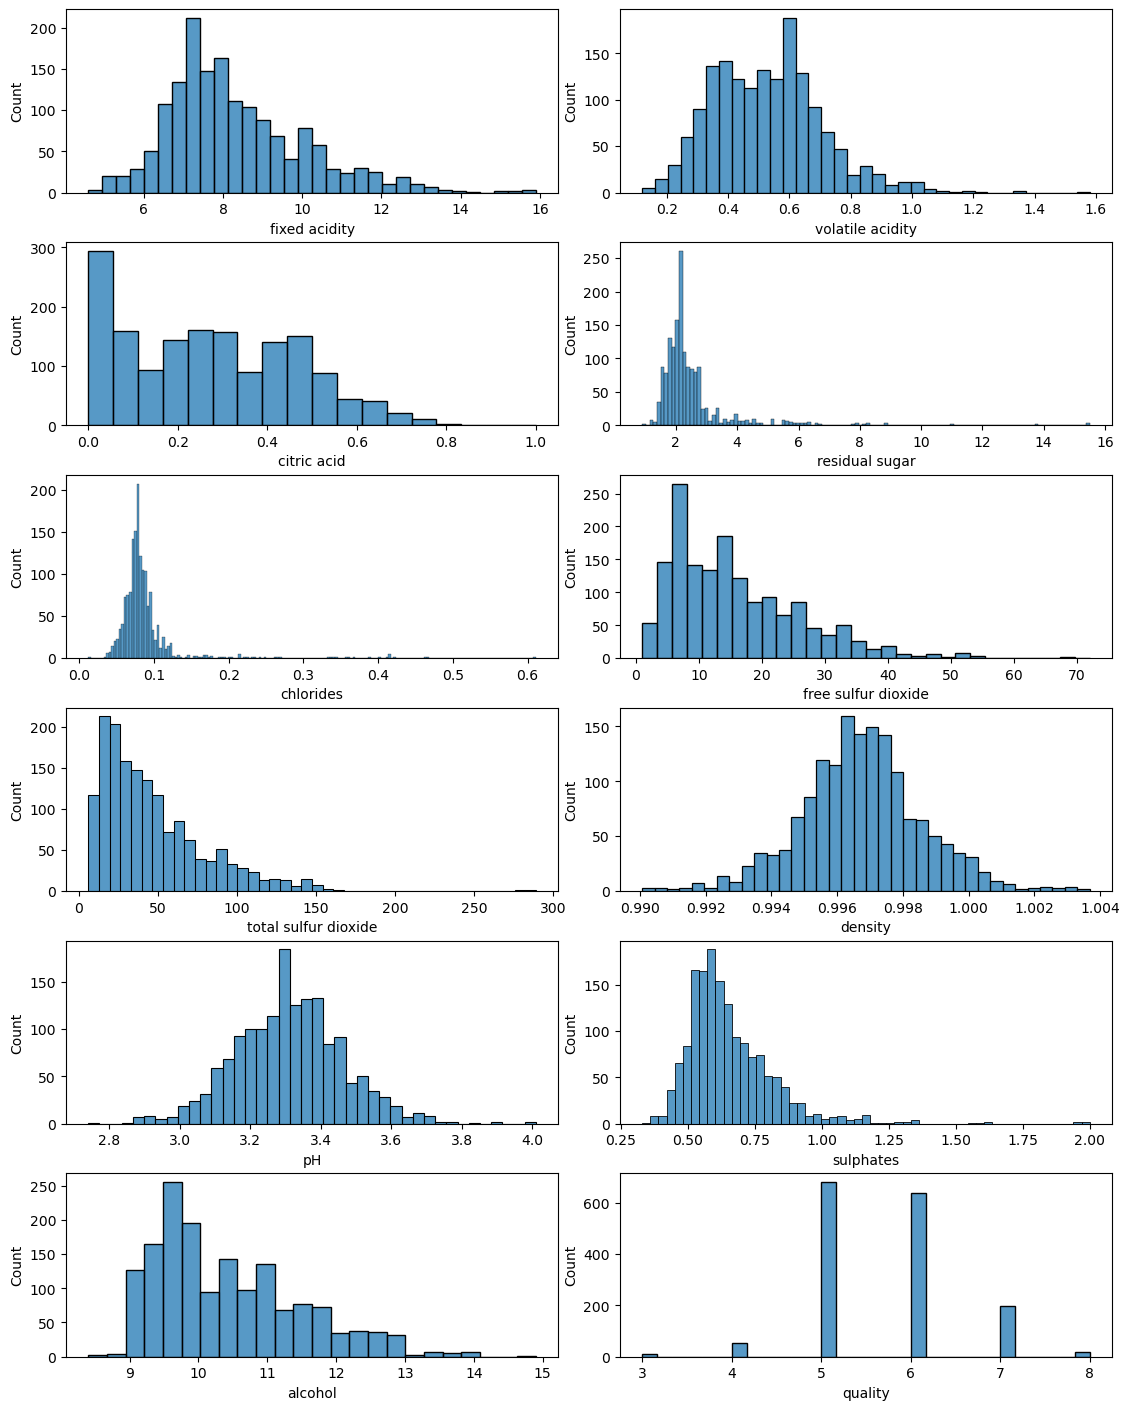

In [5]:
fig, axes = plt.subplots(6,2,figsize=(13.5,17.5))
fig.subplots_adjust(hspace=0.27, wspace=0.125)

sns.histplot(ax=axes[0,0], data=df['fixed acidity'])

sns.histplot(ax=axes[0,1], data=df['volatile acidity'])

sns.histplot(ax=axes[1,0], data=df['citric acid'])

sns.histplot(ax=axes[1,1], data=df['residual sugar'])

sns.histplot(ax=axes[2,0], data=df.chlorides)

sns.histplot(ax=axes[2,1], data=df['free sulfur dioxide'])

sns.histplot(ax=axes[3,0], data=df['total sulfur dioxide'])

sns.histplot(ax=axes[3,1], data=df.density)

sns.histplot(ax=axes[4,0], data=df.pH)

sns.histplot(ax=axes[4,1], data=df.sulphates)

sns.histplot(ax=axes[5,0], data=df.alcohol)

sns.histplot(ax=axes[5,1], data=df.quality)

### Як можна побачити на графіках вище, в датасеті присутні викиди. Позбавимось них

Для цього використаємо метод Z-score.

In [6]:
threshold = 3

df = df[(np.abs(stats.zscore(df)) < threshold).all(axis=1)]

<AxesSubplot:xlabel='quality', ylabel='Count'>

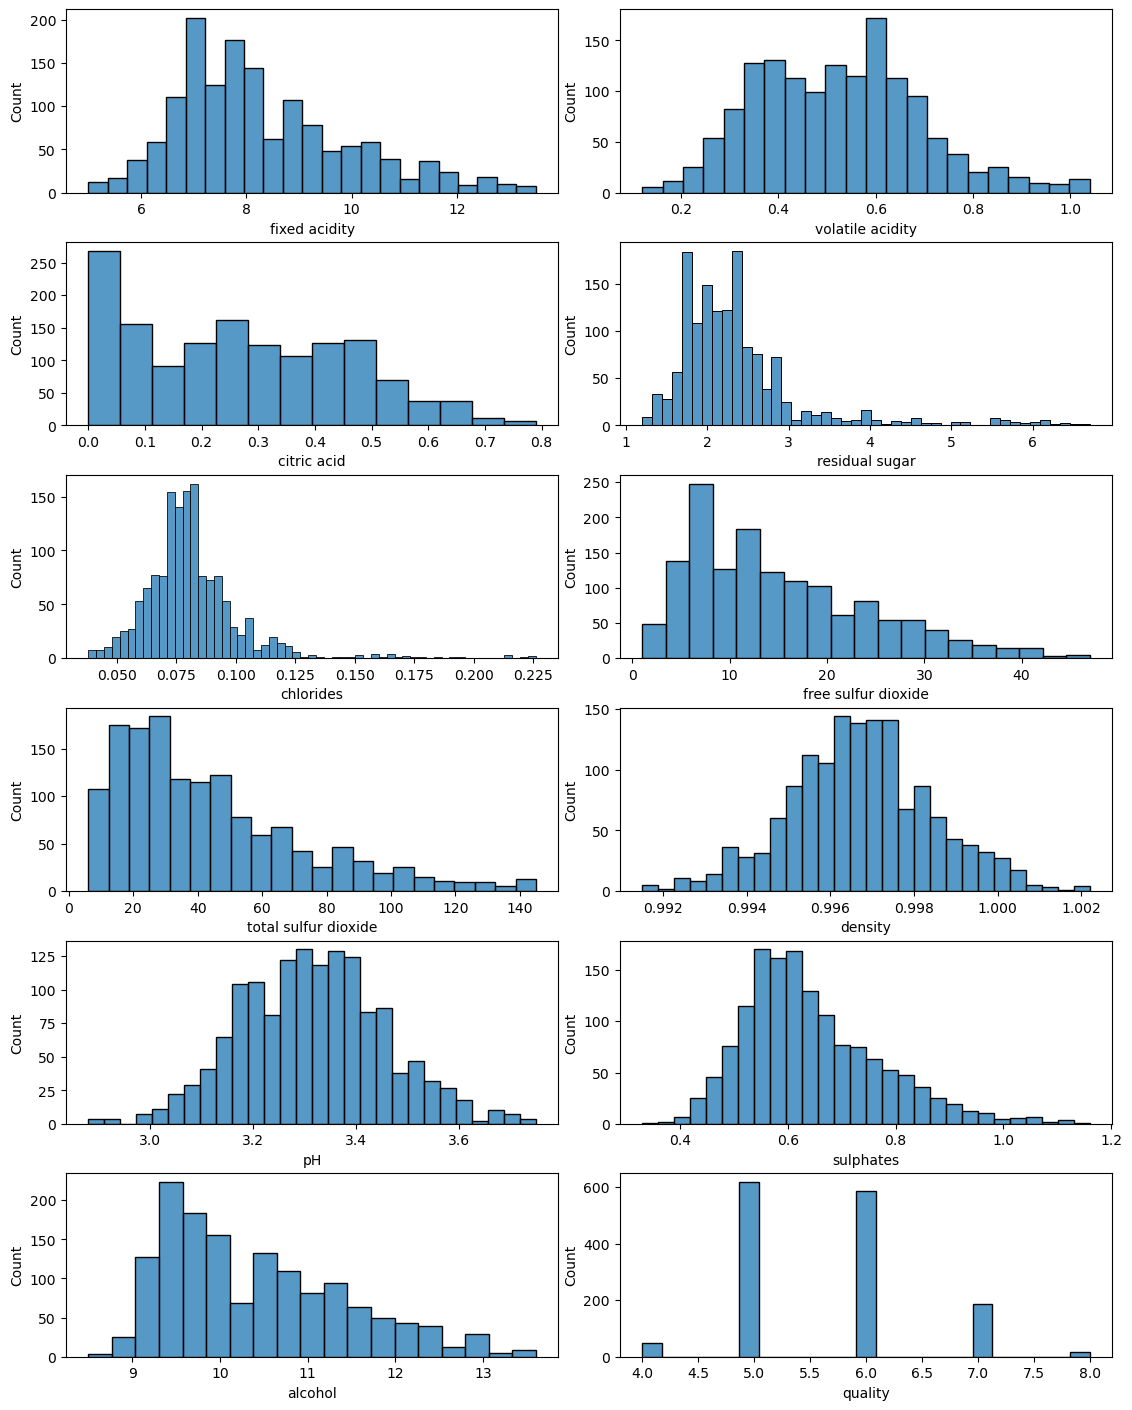

In [7]:
fig, axes = plt.subplots(6,2,figsize=(13.5,17.5))
fig.subplots_adjust(hspace=0.27, wspace=0.125)

sns.histplot(ax=axes[0,0], data=df['fixed acidity'])

sns.histplot(ax=axes[0,1], data=df['volatile acidity'])

sns.histplot(ax=axes[1,0], data=df['citric acid'])

sns.histplot(ax=axes[1,1], data=df['residual sugar'])

sns.histplot(ax=axes[2,0], data=df.chlorides)

sns.histplot(ax=axes[2,1], data=df['free sulfur dioxide'])

sns.histplot(ax=axes[3,0], data=df['total sulfur dioxide'])

sns.histplot(ax=axes[3,1], data=df.density)

sns.histplot(ax=axes[4,0], data=df.pH)

sns.histplot(ax=axes[4,1], data=df.sulphates)

sns.histplot(ax=axes[5,0], data=df.alcohol)

sns.histplot(ax=axes[5,1], data=df.quality)

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.386567


#### Найбільший кофіцієнт кореляції до quality є alcohol (0.501501). Тому при побудові простої лінійної регресії будемо опиратися на цей параметр.

In [9]:
X = df.alcohol.values.reshape(-1, 1)
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

print('R²:', reg.score(X_test, y_test))

R²: 0.2314645142417886


#### Побудуємо множинну лінійну регресію

In [10]:
X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

score = reg.score(X_test, y_test)
print('R^2 score:', score)

R^2 score: 0.3509840002237634


#### Побудуємо поліноміальну регресію

In [14]:
X = df.drop(['quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_pred = reg.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.3597306491006219


## Висновок



Порівняв коефіцієнти детермінації R^2 трьох наших моделей, можна побачити, що поліноміальна регресія є найкращим вибором для нашої вибірки даних.